In [83]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,learning_curve,validation_curve
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
import pylab 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


data = pd.read_csv('Bangalore.csv')
data.drop('Location',axis=1,inplace=True)
data.columns = data.columns.str.replace(' ','_')
prices = data['Price']
features = data.drop('Price', axis = 1)
    
print ("Bangalore housing dataset has {} data points with {} variables each.".format(*data.shape))

Bangalore housing dataset has 6207 data points with 39 variables each.


In [84]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print ("Statistics for Bangalore housing dataset:\n")
print ("Minimum price: Rs.{:,.2f}".format(minimum_price))
print ("Maximum price: Rs.{:,.2f}".format(maximum_price))
print ("Mean price: Rs.{:,.2f}".format(mean_price))
print ("Median price Rs.{:,.2f}".format(median_price))
print ("Standard deviation of prices: Rs.{:,.2f}".format(std_price))

Statistics for Bangalore housing dataset:

Minimum price: Rs.2,000,000.00
Maximum price: Rs.300,000,000.00
Mean price: Rs.10,585,104.83
Median price Rs.7,368,000.00
Standard deviation of prices: Rs.14,108,297.37


In [85]:
data[data.NofBedrooms<2]

,Price,Area,NofBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
9,3506000,660,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27,3506000,660,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
47,3506000,660,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
83,2951000,649,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
183,3506000,660,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,11000000,793,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6096,33100000,695,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6170,8200000,720,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6188,12500000,888,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [86]:
data[data.NofBedrooms<2].describe()

,Price,Area,NofBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.300000e+02,230.000000,230.0,230.000000,230.000000,230.000000,230.00000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,7.633600e+06,797.765217,1.0,0.056522,6.195652,6.404348,6.36087,6.286957,6.300000,6.256522,...,6.404348,6.173913,6.226087,6.173913,6.152174,6.173913,6.173913,6.173913,6.143478,6.173913
std,1.244364e+07,261.886883,0.0,0.231430,4.126914,3.820992,3.88764,3.997303,3.978271,4.041199,...,3.820992,4.156882,4.084395,4.156882,4.186521,4.156882,4.156882,4.156882,4.198287,4.156882
min,2.096000e+06,415.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.735000e+06,622.500000,1.0,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.650500e+06,711.500000,1.0,0.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,7.830000e+06,1000.000000,1.0,0.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,1.750000e+08,1407.000000,1.0,1.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


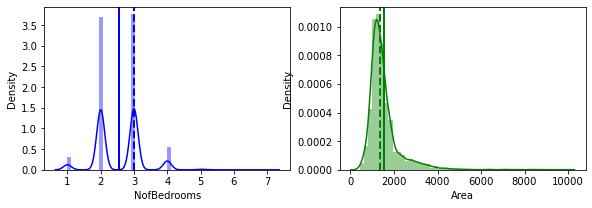

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
clr = ['blue', 'green']
fig, axs = plt.subplots(ncols=2,figsize=(15,3))


for i, var in enumerate(['NofBedrooms', 'Area']):
    plt.subplot(131 + i)
    sns.distplot(data[var],  color = clr[i])
    plt.axvline(data[var].mean(), color=clr[i], linestyle='solid', linewidth=2)
    plt.axvline(data[var].median(), color=clr[i], linestyle='dashed', linewidth=2)

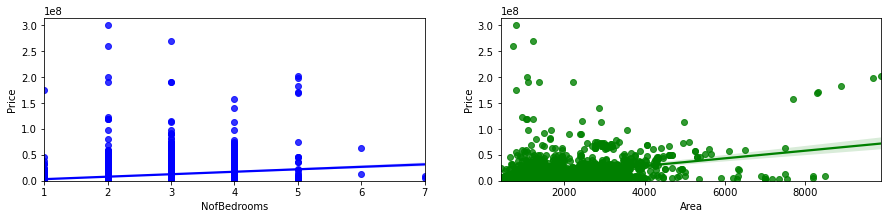

In [88]:
fig, axs = plt.subplots(ncols=2,figsize=(15,3))

for i, var in enumerate(['NofBedrooms', 'Area']):
    lm = sns.regplot(data[var], prices, ax = axs[i], color=clr[i])
    lm.set(ylim=(0, None))
    

In [89]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

print("Training and testing split was successful.")



Training and testing split was successful.


In [90]:
def ModelLearning(X, y):

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)


    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):

        regressor = DecisionTreeRegressor(max_depth = depth)

        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')

        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):

    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()


def PredictTrials(X, y, fitter, data):

    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)

        # Fit the data
        reg = fitter(X_train, y_train)
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        print("Trial {}: Rs.{:,.2f}".format(k+1, pred))


    print("\nRange in prices: Rs.{:,.2f}".format(max(prices) - min(prices)))


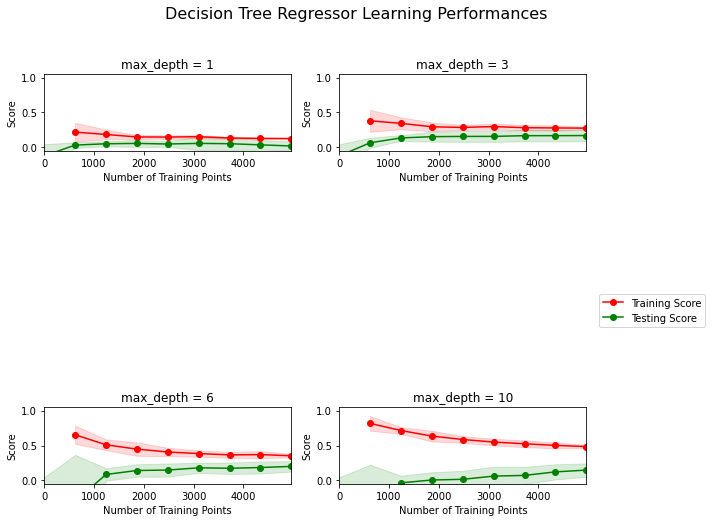

In [91]:
ModelLearning(features, prices)

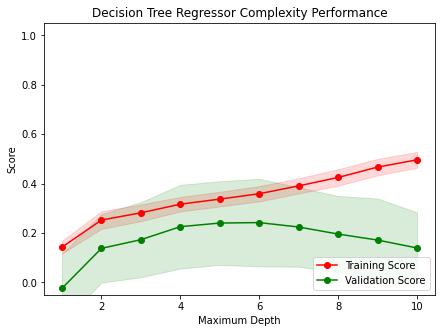

In [92]:
ModelComplexity(X_train, y_train)

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    score = r2_score(y_true, y_predict)
    return score

def fit_model(X, y):
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)


    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}


    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [94]:

reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 6 for the optimal model.


In [95]:

client_data = [[3000,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0],
              [2000,2,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0],
              [1000,3,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0]] 

for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: RS.{:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: RS.21,500,000.00
Predicted selling price for Client 2's home: RS.8,711,736.79
Predicted selling price for Client 3's home: RS.4,712,418.08


<AxesSubplot:>

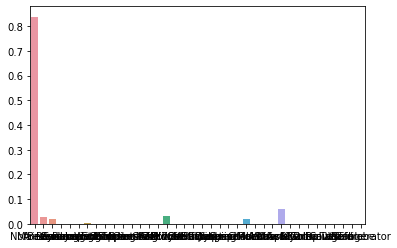

In [96]:
sns.barplot(X_train.columns, reg.feature_importances_)

In [97]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: Rs.26,352,173.86
Trial 2: Rs.28,659,036.10
Trial 3: Rs.31,645,614.00
Trial 4: Rs.34,753,398.00
Trial 5: Rs.36,239,705.81
Trial 6: Rs.28,814,062.44
Trial 7: Rs.33,913,888.83
Trial 8: Rs.32,327,999.96
Trial 9: Rs.28,196,428.52
Trial 10: Rs.28,633,333.28

Range in prices: Rs.9,887,531.95


In [98]:
print(features.describe())

              Area  NofBedrooms       Resale  MaintenanceStaff    Gymnasium  \
count  6207.000000  6207.000000  6207.000000       6207.000000  6207.000000   
mean   1526.094248     2.556952     0.078782          6.208797     6.461576   
std     764.845609     0.694300     0.269420          4.126883     3.752421   
min     415.000000     1.000000     0.000000          0.000000     0.000000   
25%    1110.000000     2.000000     0.000000          0.000000     1.000000   
50%    1340.000000     3.000000     0.000000          9.000000     9.000000   
75%    1662.500000     3.000000     0.000000          9.000000     9.000000   
max    9900.000000     7.000000     1.000000          9.000000     9.000000   

       SwimmingPool  LandscapedGardens  JoggingTrack  RainWaterHarvesting  \
count   6207.000000        6207.000000   6207.000000          6207.000000   
mean       6.436121           6.382471      6.396649             6.373933   
std        3.792567           3.875271      3.853661     

In [99]:
""""
features = [
    'Area',
    'NofBedrooms',
    'Resale',
    'MaintenanceStaff',
    'Gymnasium',
    'SwimmingPool',
    'LandscapedGardens',
    'JoggingTrack',
    'RainWaterHarvesting',
    'IndoorGames',
    'ShoppingMall',
    'Intercom',
    'SportsFacility',
    'ATM',
    'ClubHouse',
    'School',
    '24X7Security',
    'PowerBackup',
    'CarParking',
    'StaffQuarter',
    'Cafeteria',
    'MultipurposeRoom',
    'Hospital',
    'WashingMachine',
    'Gasconnection',
    'AC',
    'Wifi',
    'Childrensplayarea',
    'LiftAvailable',
    'BED',
    'VaastuCompliant',
    'Microwave',
    'GolfCourse',
    'TV',
    'DiningTable',
    'Sofa',
    'Wardrobe',
    'Refrigerator'

    
]
"""
features = [
    'Area',
    'NofBedrooms',
    'Resale',
    'MaintenanceStaff'
]

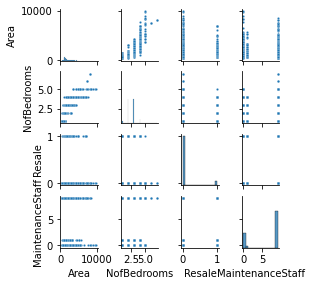

In [100]:

sns.pairplot(
    data=data,
    vars=features,
    height=1,
    plot_kws={'s': 5}
);

# Correlation plot of features

In [101]:
features = [
    'Area',
    'NofBedrooms',
    'Resale',
    'MaintenanceStaff',
    'Gymnasium',
    'SwimmingPool',
    'LandscapedGardens',
    'JoggingTrack',
    'RainWaterHarvesting',
    'IndoorGames',
    'ShoppingMall',
    'Intercom',
    'SportsFacility',
    'ATM',
    'ClubHouse',
    'School',
    '24X7Security',
    'PowerBackup',
    'CarParking',
    'StaffQuarter',
    'Cafeteria',
    'MultipurposeRoom',
    'Hospital',
    'WashingMachine',
    'Gasconnection',
    'AC',
    'Wifi',
    'Childrensplayarea',
    'LiftAvailable',
    'BED',
    'VaastuCompliant',
    'Microwave',
    'GolfCourse',
    'TV',
    'DiningTable',
    'Sofa',
    'Wardrobe',
    'Refrigerator'

    
]
corr = data[features].corr()

In [102]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


    
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

,Area,NofBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Childrensplayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Area,1.00,0.73,0.02,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
NofBedrooms,0.73,1.00,-0.02,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.03,0.03,0.02,0.03,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.03,0.03,0.03,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.03
Resale,0.02,-0.02,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.03,-0.03,-0.02,-0.03,-0.03,-0.03,-0.02,-0.04,-0.03,-0.03,-0.04,-0.03,-0.04,-0.03,-0.04,-0.03,-0.04,-0.03,-0.04,-0.03,-0.04,-0.04,-0.04,-0.03,-0.04
MaintenanceStaff,0.01,0.02,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Gymnasium,0.01,0.03,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
SwimmingPool,0.01,0.03,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
LandscapedGardens,0.01,0.03,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
JoggingTrack,0.02,0.03,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
RainWaterHarvesting,0.01,0.03,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
IndoorGames,0.01,0.03,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Linear Model


In [103]:
print(features)

['Area', 'NofBedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'Childrensplayarea', 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']


In [104]:
reduced_features = [f for f in features  ]
reduced_features 

['Area',
 'NofBedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 'Childrensplayarea',
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [105]:
data2 = pd.read_csv('Bangalore.csv')
X_train, X_test, y_train, y_test = train_test_split(
    data[reduced_features].values,
    np.log(data2['Price'].values),
    test_size=0.2
)


X_trainc = sm.add_constant(X_train)


reg = sm.OLS(y_train, X_trainc)

# fit model
fit = reg.fit()

# model summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     48.99
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          8.11e-267
Time:                        20:12:01   Log-Likelihood:                -4314.3
No. Observations:                4965   AIC:                             8695.
Df Residuals:                    4932   BIC:                             8909.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0579      0.075    201.679      0.000      14.911      15.204
x1             0.0003   1.59e-05     21.563      0.000       0.000       0.000
x2             0.0156      0.018      0.888      0.374      -0.019       0.050
x3            -0.1481      0.034     -4.354      0.000      -0.215      -0.081
x4            -0.1118      0.054     -2.068      0.039      -0.218      -0.006
x5             0.0075      0.078      0.097      0.923      -0.145       0.160
x6             0.2856      0.060      4.781      0.000       0.168       0.403
x7            -0.1019      0.046     -2.200      0.028      -0.193      -0.011
x8             0.1383      0.050      2.759      0.006       0.040       0.237
x9             0.1749      0.045      3.916      0.000       0.087       0.262
x10           -0.0344      0.042     -0.818      0.413      -0.117       0.048
x11            0.1483      0.074      1.998      0.046       0.003       0.294
x12           -0.0944      0.045     -2.116      0.034      -0.182      -0.007
x13            0.0668      0.042      1.597      0.110      -0.015       0.149
x14           -0.1629      0.058     -2.815      0.005      -0.276      -0.049
x15            0.0579      0.050      1.149      0.250      -0.041       0.157
x16           -0.3759      0.084     -4.449      0.000      -0.541      -0.210
x17            0.0289      0.051      0.570      0.569      -0.071       0.128
x18           -0.1196      0.069     -1.728      0.084      -0.255       0.016
x19            0.1403      0.040      3.508      0.000       0.062       0.219
x20            0.1205      0.055      2.174      0.030       0.012       0.229
x21           -0.0440      0.043     -1.021      0.307      -0.129       0.041
x22           -0.0529      0.040     -1.319      0.187      -0.131       0.026
x23            0.1593      0.118      1.355      0.176      -0.071       0.390
x24           -0.0498      0.059     -0.842      0.400      -0.166       0.066
x25            0.2765      0.060      4.612      0.000       0.159       0.394
x26            0.0961      0.307      0.313      0.754      -0.506       0.698
x27           -0.2505      0.079     -3.181      0.001      -0.405      -0.096
x28           -0.1768      0.069     -2.550      0.011      -0.313      -0.041
x29            0.0585      0.052      1.121      0.262      -0.044       0.161
x30            0.2285      0.394      0.580      0.562      -0.544       1.001
x31           -0.0445      0.043     -1.034      0.301      -0.129       0.040
x32           -0.0498      0.059     -0.842      0.400      -0.166       0.066
x33            0.1613      0.098      1.643      0.100      -0.031       0.354
x34           -0.0498      0.059     -0.842      0.400      -0.166       0.066
x35           -0.0498      0.059     -0.842      0.400      -0.166       0.066
x3

In [106]:
X_testc = sm.add_constant(X_test)

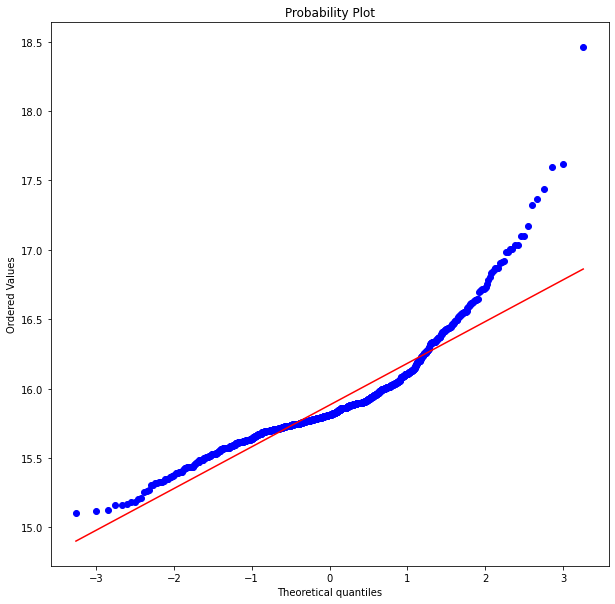

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))

stats.probplot(
    x=fit.predict(X_testc), 
    dist="norm", 
    plot=ax
);

In [108]:
Data = pd.read_csv('Bangalore.csv')
Data.head(5).T
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,6207.0,1.058510e+07,1.410943e+07,2000000.0,5000000.0,7368000.0,10700000.0,300000000.0
Area,6207.0,1.526094e+03,7.648456e+02,415.0,1110.0,1340.0,1662.5,9900.0
NofBedrooms,6207.0,2.556952e+00,6.943000e-01,1.0,2.0,3.0,3.0,7.0
Resale,6207.0,7.878202e-02,2.694199e-01,0.0,0.0,0.0,0.0,1.0
MaintenanceStaff,6207.0,6.208797e+00,4.126883e+00,0.0,0.0,9.0,9.0,9.0
Gymnasium,6207.0,6.461576e+00,3.752421e+00,0.0,1.0,9.0,9.0,9.0
SwimmingPool,6207.0,6.436121e+00,3.792567e+00,0.0,1.0,9.0,9.0,9.0
LandscapedGardens,6207.0,6.382471e+00,3.875271e+00,0.0,1.0,9.0,9.0,9.0
JoggingTrack,6207.0,6.396649e+00,3.853661e+00,0.0,1.0,9.0,9.0,9.0
RainWaterHarvesting,6207.0,6.373933e+00,3.888204e+00,0.0,1.0,9.0,9.0,9.0


In [109]:
Data.drop('Location',axis=1,inplace=True)
X = Data.drop(['Price'],axis =1).values
y = Data['Price'].values

In [110]:
X

array([[3340,    4,    0, ...,    0,    0,    0],
       [1045,    2,    0, ...,    0,    0,    0],
       [1179,    2,    0, ...,    0,    0,    0],
       ...,
       [1143,    2,    0, ...,    9,    9,    9],
       [1680,    3,    0, ...,    9,    9,    9],
       [1162,    2,    0, ...,    9,    9,    9]], dtype=int64)

In [111]:
y

array([30000000,  7888000,  4866000, ...,  7373000,  4985000, 10900000],
      dtype=int64)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data[reduced_features].values,
    np.log(data2['Price'].values),
    test_size=0.2
)

In [113]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4965, 38)
(4965,)
(1242, 38)
(1242,)


In [115]:
df = Data
df

,Price,Area,NofBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,4,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,2,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,3,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [116]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Price']
y = df.loc[:, df.columns == 'Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [117]:
X_train

,Area,NofBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
696,1075,2,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1476,1000,2,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1555,1055,2,0,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
852,2140,3,0,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
596,1210,3,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,760,1,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4060,1459,3,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1346,1340,3,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3454,1400,3,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [118]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [119]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(38, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               4992      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


In [120]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.05)

Epoch 1/1000
129/129 [==============================] - 0s 2ms/step - loss: 299291709014016.0000 - mae: 10463845.0000 - val_loss: 350152611069952.0000 - val_mae: 10219623.0000
Epoch 2/1000
129/129 [==============================] - 0s 1ms/step - loss: 299233257193472.0000 - mae: 10461021.0000 - val_loss: 350027151048704.0000 - val_mae: 10213647.0000
Epoch 3/1000
129/129 [==============================] - 0s 1ms/step - loss: 299006295015424.0000 - mae: 10450134.0000 - val_loss: 349667346874368.0000 - val_mae: 10196464.0000
Epoch 4/1000
129/129 [==============================] - 0s 994us/step - loss: 298495495897088.0000 - mae: 10425398.0000 - val_loss: 348960623427584.0000 - val_mae: 10162655.0000
Epoch 5/1000
129/129 [==============================] - 0s 1ms/step - loss: 297590096658432.0000 - mae: 10381969.0000 - val_loss: 347803062632448.0000 - val_mae: 10107066.0000
Epoch 6/1000
129/129 [==============================] - 0s 1ms/step - loss: 296192554565632.0000 - mae: 10314503.0000 

In [122]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [123]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

59/59 [==============================] - 0s 817us/step - loss: 172329757835264.0000 - mae: 5359298.0000
Mean squared error on test data:  172329757835264.0
Mean absolute error on test data:  5359298.0


In [124]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  176353432025778.53
Mean absolute error on test data:  5608971.885552261


In [125]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)

print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)

Mean squared error on test data:  200934840353099.62
Mean absolute error on test data:  5658414.63534939
